In [2]:

#

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Проверяем доступность GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"⚙️ Используется устройство: {device}")


⚙️ Используется устройство: cpu


In [3]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Загружаем тренировочный и тестовый наборы данных
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


100%|██████████| 170M/170M [00:04<00:00, 34.6MB/s]


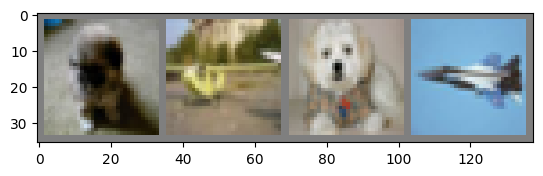

dog   plane dog   plane


In [4]:

def imshow(img):
    img = img / 2 + 0.5     # денормализация
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Получаем несколько случайных изображений
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Отображаем изображения
imshow(torchvision.utils.make_grid(images))
# Печатаем метки
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))


In [5]:

# Определение архитектуры CNN

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net().to(device)


In [6]:

#  Настройка функции потерь и оптимизатора

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [9]:

#  Обучение модели

for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[Эпоха: {epoch + 1}, Батч: {i + 1}] Потеря: {running_loss / 2000:.3f}')
            running_loss = 0.0

print(' Обучение завершено!')


[Эпоха: 1, Батч: 2000] Потеря: 2.000
[Эпоха: 1, Батч: 4000] Потеря: 1.739
[Эпоха: 1, Батч: 6000] Потеря: 1.620
[Эпоха: 1, Батч: 8000] Потеря: 1.554
[Эпоха: 1, Батч: 10000] Потеря: 1.481
[Эпоха: 1, Батч: 12000] Потеря: 1.418
[Эпоха: 2, Батч: 2000] Потеря: 1.377
[Эпоха: 2, Батч: 4000] Потеря: 1.349
[Эпоха: 2, Батч: 6000] Потеря: 1.328
[Эпоха: 2, Батч: 8000] Потеря: 1.329
[Эпоха: 2, Батч: 10000] Потеря: 1.293
[Эпоха: 2, Батч: 12000] Потеря: 1.293
[Эпоха: 3, Батч: 2000] Потеря: 1.225
[Эпоха: 3, Батч: 4000] Потеря: 1.207
[Эпоха: 3, Батч: 6000] Потеря: 1.203
[Эпоха: 3, Батч: 8000] Потеря: 1.192
[Эпоха: 3, Батч: 10000] Потеря: 1.182
[Эпоха: 3, Батч: 12000] Потеря: 1.197
[Эпоха: 4, Батч: 2000] Потеря: 1.099
[Эпоха: 4, Батч: 4000] Потеря: 1.126
[Эпоха: 4, Батч: 6000] Потеря: 1.109
[Эпоха: 4, Батч: 8000] Потеря: 1.124
[Эпоха: 4, Батч: 10000] Потеря: 1.125
[Эпоха: 4, Батч: 12000] Потеря: 1.094
[Эпоха: 5, Батч: 2000] Потеря: 1.034
[Эпоха: 5, Батч: 4000] Потеря: 1.029
[Эпоха: 5, Батч: 6000] Потеря:

In [26]:



PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)
print("💾 Модель сохранена как cifar_net.pth")


💾 Модель сохранена как cifar_net.pth


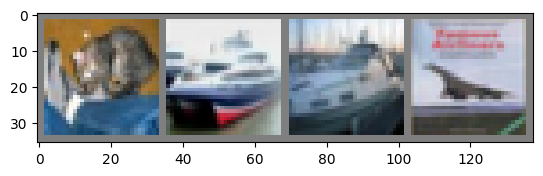

Истинные метки: cat   ship  ship  plane
Предсказанные метки: cat   car   ship  plane


In [11]:

dataiter = iter(testloader)
images, labels = next(dataiter)

# Показываем изображения
imshow(torchvision.utils.make_grid(images))
print('Истинные метки:', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

# Получаем предсказания
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Предсказанные метки:', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))


In [12]:

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Общая точность модели: {100 * correct / total:.2f}%')


Общая точность модели: 61.56%


In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)


In [34]:
EPOCHS = 25 # for better accuracy

for epoch in range(EPOCHS):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Эпоха {epoch+1}, Потеря: {running_loss / len(trainloader):.3f}')

print(' Обучение завершено!')


KeyboardInterrupt: 

In [21]:
torch.save(net.state_dict(), "improved_cifar10.pth")

In [32]:
image, label = trainset[10]
img = transforms.ToPILImage()(image)
img.save("test_image.png")